In [ ]:
#DAMOS ACCESO A GOOGLE COLAB A NUESTRA CARPETA DE DRIVE PARA IMPORTAR LOS CSV
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#CARGAMOS TODOS LOS DATAFRAMES HACIENDO USO DE UN DICCIONARIO

import pandas as pd
import os

carpeta = '/content/drive/MyDrive/C25262 DATA ANALYTICS - PREENTREGA_PROYECTO_INTEGRADOR/DATASETS/'

dataframes = {}

for archivo in os.listdir(carpeta):
    if archivo.endswith('.csv'):
        nombre = os.path.splitext(archivo)[0]
        ruta = os.path.join(carpeta, archivo)
        dataframes[nombre] = pd.read_csv(ruta)
        print(f'Cargado: {nombre}')

print("\n✅ Archivos cargados:", list(dataframes.keys()))

Cargado: clientes
Cargado: marketing
Cargado: ventas

✅ Archivos cargados: ['clientes', 'marketing', 'ventas']


In [ ]:
#ANALISIS EXPLORATORIO DE LOS DF'S
def analizar_dataframe(df, nombre):
    print(f"\n{'='*60}")
    print(f"📊 ANALISIS EXPLORATORIO: {nombre}")
    print(f"{'='*60}\n")

    print("🔹 Dimensiones:", df.shape)
    print("\n🔹 Tipos de datos:\n", df.dtypes)

    print("\n🔹 Valores nulos por columna:\n", df.isnull().sum())

    # ✅ sin datetime_is_numeric
    print("\n🔹 Estadísticas descriptivas:\n", df.describe(include='all'))

    print("\n🔹 Cantidad de valores únicos por columna:\n", df.nunique())

    print("\n🔹 Primeras filas del dataset:\n", df.head())

for nombre, df in dataframes.items():
    analizar_dataframe(df, nombre)


📊 ANALISIS EXPLORATORIO: clientes

🔹 Dimensiones: (567, 5)

🔹 Tipos de datos:
 id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

🔹 Valores nulos por columna:
 id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

🔹 Estadísticas descriptivas:
         id_cliente       nombre        edad         ciudad      ingresos
count   567.000000          567  567.000000            567    567.000000
unique         NaN          567         NaN             12           NaN
top            NaN  Micah Matis         NaN  Mar del Plata           NaN
freq           NaN            1         NaN             63           NaN
mean    284.000000          NaN   37.940035            NaN  34668.739012
std     163.823075          NaN   10.202885            NaN  12974.531446
min       1.000000          NaN   20.000000            NaN    170.290000
25%     142.500000          NaN   30.000000            Na

In [ ]:

"""
    Limpieza básica de un DataFrame.

    Pasos realizados:
    1. Eliminación de filas duplicadas.
    2. Eliminación de espacios en columnas de tipo texto.
    3. Eliminación de caracteres no deseados en columnas de tipo texto (ej: símbolos, saltos de línea).

    Parámetros:
        df (pd.DataFrame): DataFrame a limpiar.
        nombre (str): Nombre del dataset (para documentación).

    Retorna:
        pd.DataFrame limpio.
"""
def limpiar_dataframe(df, nombre):
    print(f"\n{'='*60}")
    print(f"🧹 LIMPIEZA DE DATAFRAME: {nombre}")
    print(f"{'='*60}\n")

    # 1️⃣ Contar duplicados antes
    n_duplicados = df.duplicated().sum()
    print(f"Filas duplicadas antes de limpieza: {n_duplicados}")

    # Eliminar duplicados
    df = df.drop_duplicates()
    print(f"Filas duplicadas después de limpieza: {df.duplicated().sum()}")

    # 2️⃣ Limpiar columnas de tipo texto usando .loc para evitar warning
    text_cols = df.select_dtypes(include=['object', 'string']).columns
    for col in text_cols:
        # Eliminar espacios al inicio y final
        df.loc[:, col] = df[col].str.strip()
        # Eliminar saltos de línea, tabs y retornos de carro
        df.loc[:, col] = df[col].str.replace(r'[\n\t\r]', ' ', regex=True)

    print(f"Columnas de texto procesadas: {list(text_cols)}")
    print(f"\nDimensiones finales del dataset: {df.shape}")

    return df



In [ ]:
dataframes_limpios = {}
for nombre, df in dataframes.items():
    df_limpio = limpiar_dataframe(df, nombre)
    dataframes_limpios[nombre] = df_limpio


🧹 LIMPIEZA DE DATAFRAME: clientes

Filas duplicadas antes de limpieza: 0
Filas duplicadas después de limpieza: 0
Columnas de texto procesadas: ['nombre', 'ciudad']

Dimensiones finales del dataset: (567, 5)

🧹 LIMPIEZA DE DATAFRAME: marketing

Filas duplicadas antes de limpieza: 0
Filas duplicadas después de limpieza: 0
Columnas de texto procesadas: ['producto', 'canal', 'fecha_inicio', 'fecha_fin']

Dimensiones finales del dataset: (90, 6)

🧹 LIMPIEZA DE DATAFRAME: ventas

Filas duplicadas antes de limpieza: 35
Filas duplicadas después de limpieza: 0
Columnas de texto procesadas: ['producto', 'precio', 'fecha_venta', 'categoria']

Dimensiones finales del dataset: (3000, 6)


In [ ]:
df = df.copy()

# --- Limpieza y conversión de datos ---
df["precio"] = (
    df["precio"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", ".", regex=False)
    .str.strip()
)
df["precio"] = pd.to_numeric(df["precio"], errors="coerce")
df["cantidad"] = pd.to_numeric(df["cantidad"], errors="coerce")

# Eliminar registros con datos faltantes
df = df.dropna(subset=["precio", "cantidad"])

# --- Calcular total de venta ---
df["total_venta"] = df["precio"] * df["cantidad"]

# --- Filtrar productos de alto rendimiento ---
promedio_ventas = df["total_venta"].mean()
ventas_altas = df[df["total_venta"] > promedio_ventas]

# --- Mostrar resultados ---
print("🔹 Promedio general de ventas:", promedio_ventas)
print(f"🔹 Productos con alto rendimiento ({len(ventas_altas)} registros):\n")

# Mostrar primeras filas de la tabla resultante
print(ventas_altas.head())

🔹 Promedio general de ventas: 488.96898450379166
🔹 Productos con alto rendimiento (1291 registros):

   id_venta           producto  precio  cantidad fecha_venta  \
1       811    Lámpara de mesa  105.10       5.0  02/01/2024   
3      1372           Heladera  114.35       8.0  02/01/2024   
7      2959          Proyector   88.17       9.0  02/01/2024   
8       318  Rincón de plantas   79.86      11.0  03/01/2024   
9       419         Candelabro   66.11       8.0  03/01/2024   

           categoria  total_venta  
1         Decoración       525.50  
3  Electrodomésticos       914.80  
7        Electrónica       793.53  
8         Decoración       878.46  
9         Decoración       528.88  


In [ ]:
# --- Agregación: resumen de ventas por categoría ---

# Aseguramos que la columna 'categoria' no tenga espacios ni valores nulos
df["categoria"] = df["categoria"].astype(str).str.strip()
df = df.dropna(subset=["categoria", "total_venta"])

# Agrupar por categoría y calcular métricas
resumen_categorias = (
    df.groupby("categoria")
    .agg(
        total_ingresos=("total_venta", "sum"),
        promedio_ingreso=("total_venta", "mean"),
        cantidad_ventas=("id_venta", "count"),
        cantidad_productos=("producto", "nunique")
    )
    .reset_index()
    .sort_values(by="total_ingresos", ascending=False)
)

# Mostrar resultados
print("🔹 Resumen de ventas por categoría de producto:\n")
print(resumen_categorias)


🔹 Resumen de ventas por categoría de producto:

           categoria  total_ingresos  promedio_ingreso  cantidad_ventas  \
1  Electrodomésticos       507671.41        503.642272             1008   
2        Electrónica       490557.00        485.219585             1011   
0         Decoración       484814.52        478.120828             1014   

   cantidad_productos  
1                  10  
2                  10  
0                  10  


In [ ]:
import pandas as pd

# Rutas
ruta_ventas = "/content/drive/MyDrive/C25262 DATA ANALYTICS - PREENTREGA_PROYECTO_INTEGRADOR/DATASETS/ventas.csv"
ruta_marketing = "/content/drive/MyDrive/C25262 DATA ANALYTICS - PREENTREGA_PROYECTO_INTEGRADOR/DATASETS/marketing.csv"
ruta_clientes = "/content/drive/MyDrive/C25262 DATA ANALYTICS - PREENTREGA_PROYECTO_INTEGRADOR/DATASETS/clientes.csv"

# Cargar los datasets
df_ventas = pd.read_csv(ruta_ventas)
df_marketing = pd.read_csv(ruta_marketing)
df_clientes = pd.read_csv(ruta_clientes)

# Revisar las primeras filas para asegurarnos de que se cargaron correctamente
print("Ventas:")
display(df_ventas.head())

print("Marketing:")
display(df_marketing.head())

print("Clientes:")
display(df_clientes.head())

Ventas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


Marketing:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


Clientes:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [ ]:
df_ventas = df_ventas.copy()
df_marketing = df_marketing.copy()

# Limpiar nombres de producto para que coincidan
df_ventas["producto"] = df_ventas["producto"].astype(str).str.strip().str.lower()
df_marketing["producto"] = df_marketing["producto"].astype(str).str.strip().str.lower()

# Integrar por producto
ventas_marketing = pd.merge(
    df_ventas,
    df_marketing,
    on="producto",
    how="left",  # conserva todas las ventas aunque no haya campaña de marketing
    suffixes=("_venta", "_mkt")
)

# Mostrar resultados
print("🔹 Dimensiones del dataset integrado Ventas + Marketing:", ventas_marketing.shape)
ventas_marketing.head()

🔹 Dimensiones del dataset integrado Ventas + Marketing: (9105, 11)


,id_venta,producto,precio,cantidad,fecha_venta,categoria,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,cuadro decorativo,$69.94,5.0,02/01/2024,Decoración,1,RRSS,5.27,27/04/2024,04/06/2024
1,792,cuadro decorativo,$69.94,5.0,02/01/2024,Decoración,31,Email,5.28,15/08/2024,12/09/2024
2,792,cuadro decorativo,$69.94,5.0,02/01/2024,Decoración,61,TV,5.30,05/11/2024,23/12/2024
3,811,lámpara de mesa,$105.10,5.0,02/01/2024,Decoración,32,Email,5.54,28/03/2024,20/04/2024
4,811,lámpara de mesa,$105.10,5.0,02/01/2024,Decoración,2,RRSS,5.88,30/05/2024,29/06/2024


In [ ]:
dfv = df_ventas.copy()

# Limpiar y convertir precio y cantidad
dfv["precio"] = (
    dfv["precio"].astype(str)
       .str.replace("$", "", regex=False)
       .str.replace(",", ".", regex=False)
       .str.strip()
)
dfv["precio"] = pd.to_numeric(dfv["precio"], errors="coerce")
dfv["cantidad"] = pd.to_numeric(dfv["cantidad"], errors="coerce")

# Eliminar filas con datos inválidos
dfv = dfv.dropna(subset=["precio", "cantidad"]).reset_index(drop=True)

# Calcular total_venta
dfv["total_venta"] = dfv["precio"] * dfv["cantidad"]

# Fecha a datetime (ajustá el formato si hace falta)
dfv["fecha_venta"] = pd.to_datetime(dfv["fecha_venta"], dayfirst=True, errors="coerce")

# Resumen rápido
print("Registros finales:", len(dfv))
dfv.head()

Registros finales: 3033


,id_venta,producto,precio,cantidad,fecha_venta,categoria,total_venta
0,792,cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70
1,811,lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50
2,1156,secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88
3,1372,heladera,114.35,8.0,2024-01-02,Electrodomésticos,914.80
4,1546,secadora,106.21,4.0,2024-01-02,Electrodomésticos,424.84


In [ ]:
# Estadísticas básicas sobre ventas (por registro)
desc_regs = dfv[["precio","cantidad","total_venta"]].describe().T
print(desc_regs)

# Estadísticas por producto (agregado)
by_producto = (
    dfv.groupby("producto")
       .agg(unidades_vendidas=("cantidad","sum"),
            ventas_totales=("total_venta","sum"),
            precio_promedio=("precio","mean"))
       .sort_values("ventas_totales", ascending=False)
)
# Mostrar top 10 productos por ventas
by_producto.head(10)


              count        mean         std   min     25%     50%     75%  \
precio       3033.0   75.289034   28.734666  26.0   50.02   75.27  100.04   
cantidad     3033.0    6.496538    3.457250   1.0    3.00    7.00    9.00   
total_venta  3033.0  488.968985  334.594511  26.3  220.50  418.05  708.89   

                 max  
precio        124.97  
cantidad       12.00  
total_venta  1488.12  


,unidades_vendidas,ventas_totales,precio_promedio
producto,,,
lámpara de mesa,1141.0,84699.15,72.757348
auriculares,988.0,76468.44,76.509252
microondas,912.0,72562.89,79.176000
cafetera,766.0,59669.54,78.904068
smartphone,677.0,55615.64,81.812157
cuadro decorativo,726.0,54297.60,74.578000
secadora,718.0,53214.24,72.617573
jarrón decorativo,675.0,51401.51,74.863627
aspiradora,661.0,51042.82,77.914706


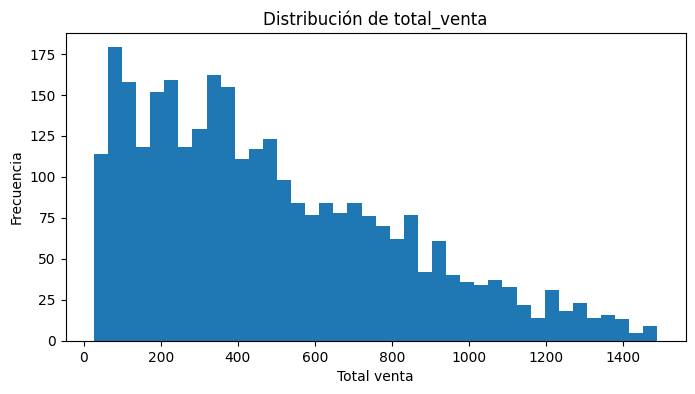

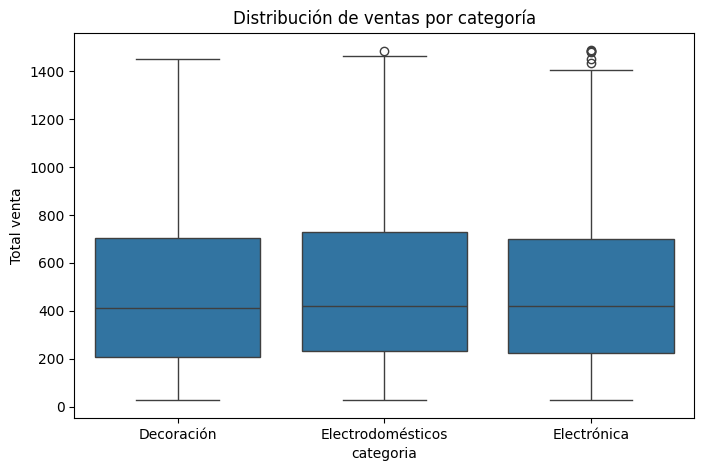

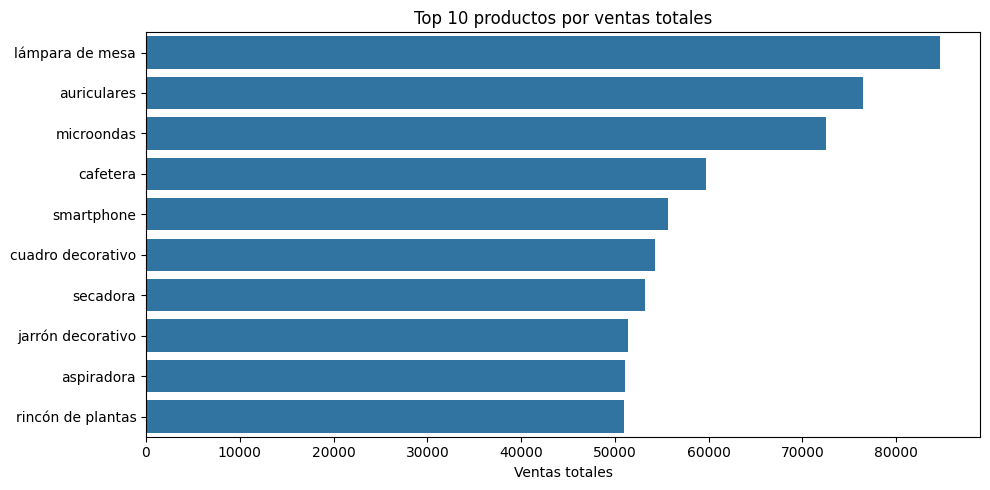

/tmp/ipython-input-1410022987.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ventas_mes = dfv.set_index("fecha_venta").resample("M")["total_venta"].sum().reset_index()


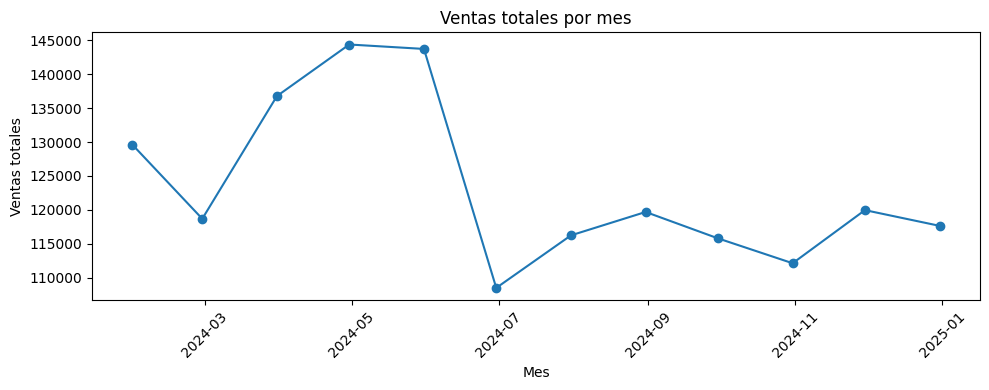

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# A) Histograma de total_venta
plt.figure(figsize=(8,4))
plt.hist(dfv["total_venta"], bins=40)
plt.title("Distribución de total_venta")
plt.xlabel("Total venta")
plt.ylabel("Frecuencia")
plt.show()

# B) Boxplot por categoria (ventas totales por venta)
plt.figure(figsize=(8,5))
sns.boxplot(data=dfv, x="categoria", y="total_venta")
plt.title("Distribución de ventas por categoría")
plt.ylabel("Total venta")
plt.show()

# C) Top 10 productos por ingresos (barplot)
top10 = by_producto.head(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top10, y="producto", x="ventas_totales", orient="h")
plt.title("Top 10 productos por ventas totales")
plt.xlabel("Ventas totales")
plt.ylabel("")
plt.tight_layout()
plt.show()

# D) Series temporal: ventas totales por mes
ventas_mes = dfv.set_index("fecha_venta").resample("M")["total_venta"].sum().reset_index()
plt.figure(figsize=(10,4))
plt.plot(ventas_mes["fecha_venta"], ventas_mes["total_venta"], marker="o")
plt.title("Ventas totales por mes")
plt.xlabel("Mes")
plt.ylabel("Ventas totales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


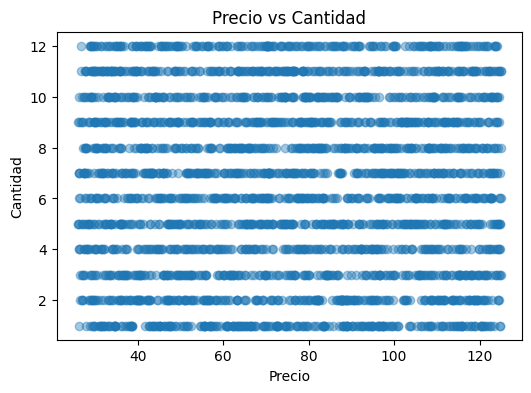

               precio  cantidad  total_venta
precio       1.000000 -0.001501     0.558799
cantidad    -0.001501  1.000000     0.773435
total_venta  0.558799  0.773435     1.000000


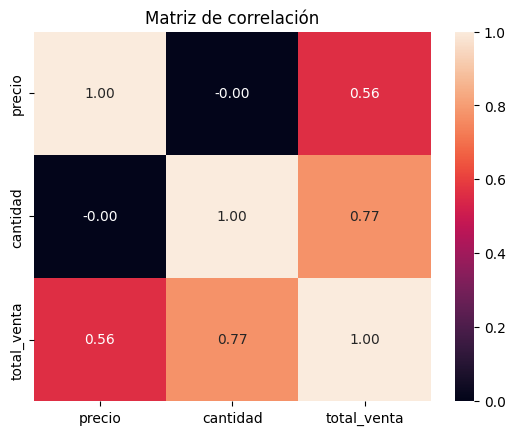

In [ ]:
# A) Scatter: precio vs cantidad
plt.figure(figsize=(6,4))
plt.scatter(dfv["precio"], dfv["cantidad"], alpha=0.4)
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Precio vs Cantidad")
plt.show()

# B) Correlación numérica y heatmap
corr = dfv[["precio","cantidad","total_venta"]].corr()
print(corr)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


In [ ]:
# Primero normalizar producto (mínimo)
dfv["producto_key"] = dfv["producto"].astype(str).str.strip().str.lower()
dfm = df_marketing.copy()
dfm["producto_key"] = dfm["producto"].astype(str).str.strip().str.lower()

# Agregar métricas por producto
resumen_final = (
    dfv.groupby("producto_key")
       .agg(
           producto_nombre=("producto","first"),
           unidades_vendidas=("cantidad","sum"),
           ventas_totales=("total_venta","sum"),
           ventas_promedio=("total_venta","mean"),
           transacciones=("id_venta","count")
       ).reset_index()
)

# Merge con marketing (info de campañas)
resumen_final = resumen_final.merge(
    dfm[["producto_key","id_campanha","canal","costo"]].drop_duplicates("producto_key"),
    on="producto_key",
    how="left"
)
# Ordenar por ventas totales
resumen_final = resumen_final.sort_values("ventas_totales", ascending=False)
resumen_final.head(10)


,producto_key,producto_nombre,unidades_vendidas,ventas_totales,ventas_promedio,transacciones,id_campanha,canal,costo
19,lámpara de mesa,lámpara de mesa,1141.0,84699.15,467.951105,181,32,Email,5.54
3,auriculares,auriculares,988.0,76468.44,520.193469,147,47,Email,4.19
20,microondas,microondas,912.0,72562.89,537.502889,135,56,Email,4.94
5,cafetera,cafetera,766.0,59669.54,505.674068,118,49,Email,5.20
26,smartphone,smartphone,677.0,55615.64,545.251373,102,21,RRSS,6.37
9,cuadro decorativo,cuadro decorativo,726.0,54297.60,542.976000,100,1,RRSS,5.27
25,secadora,secadora,718.0,53214.24,516.643107,103,3,RRSS,5.10
16,jarrón decorativo,jarrón decorativo,675.0,51401.51,503.936373,102,15,RRSS,4.65
2,aspiradora,aspiradora,661.0,51042.82,500.419804,102,40,Email,6.24
24,rincón de plantas,rincón de plantas,698.0,50997.55,499.975980,102,38,Email,5.76


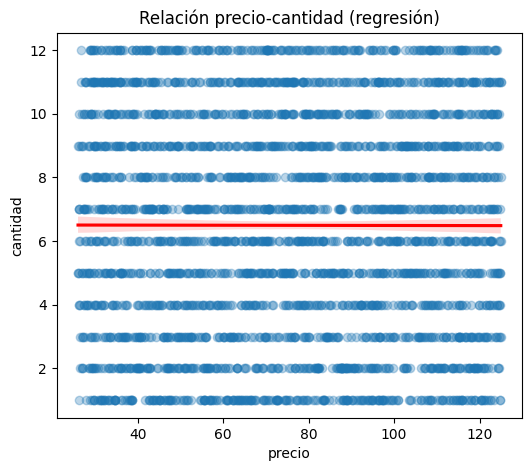

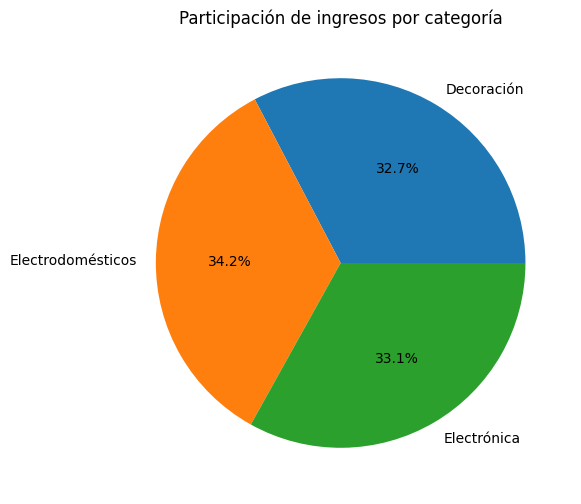

In [ ]:
# Parejas precio-cantidad con regresión
plt.figure(figsize=(6,5))
sns.regplot(data=dfv, x="precio", y="cantidad", scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("Relación precio-cantidad (regresión)")
plt.show()

# Heatmap participación de categorias en ingresos (proporciones)
cat_part = dfv.groupby("categoria")["total_venta"].sum()
plt.figure(figsize=(6,6))
cat_part.plot.pie(autopct="%.1f%%", legend=False)
plt.title("Participación de ingresos por categoría")
plt.ylabel("")
plt.show()
